In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('/content/titanic_dataset.csv')


In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Dropping some useless columns
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
#Check for null values
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
#Handling null values

data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data=data.fillna({"Cabin":'X'})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S


In [9]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [10]:
#Dealing with categorical features
data["Cabin"]=data["Cabin"].str.slice(0,1)
data['Cabin']=data['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[0,1,2,3,4,5,6,7,8])
data['Sex']=data['Sex'].replace(['male','female'],[0,1])
data['Embarked']=data['Embarked'].replace(['S','C','Q'],[0,1,2])

All null values are removed

In [11]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


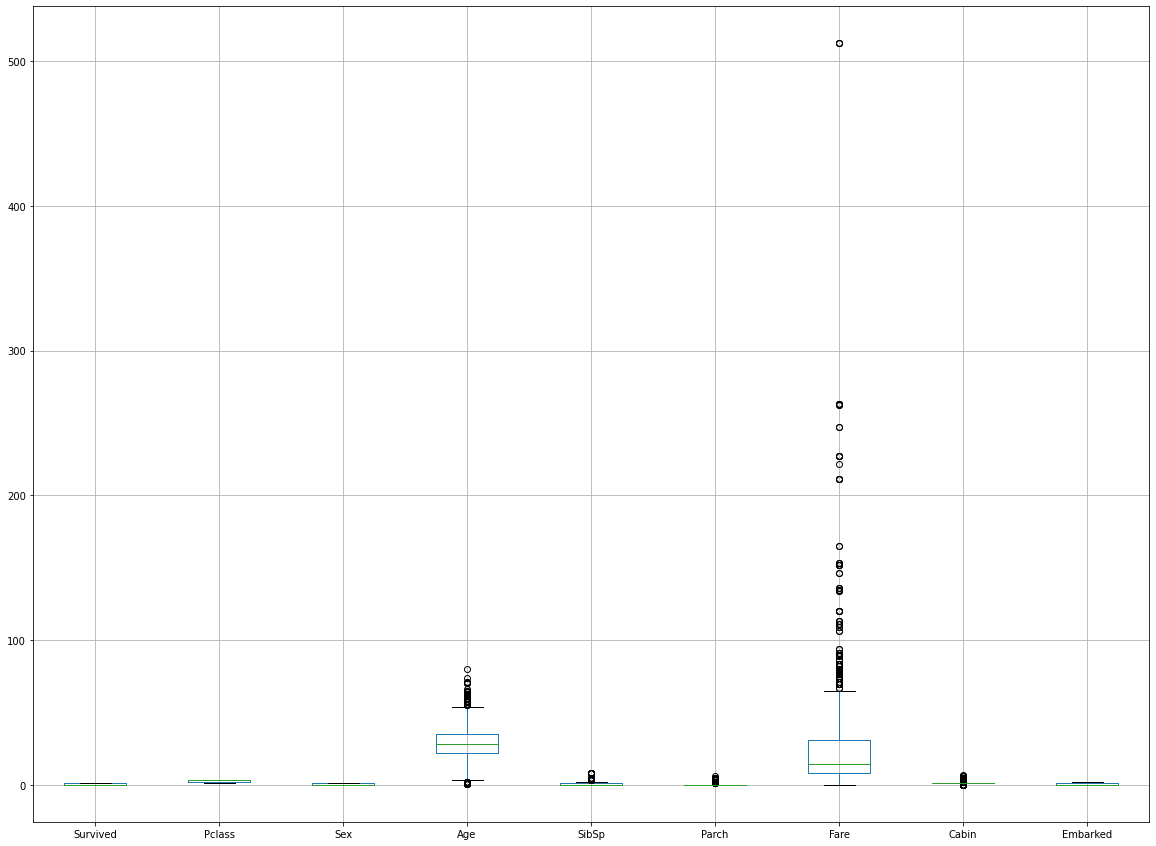

In [12]:
#Finding outliers
graph=data.select_dtypes(include=['int64','float64','int32'])
graph.boxplot(figsize=(20,15))
plt.show()

In [13]:
#IQR calculation
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

Survived      0
Pclass        0
Sex           0
Age          66
SibSp        46
Parch       213
Fare        116
Cabin       157
Embarked      0
dtype: int64


In [14]:
for i in ['Age', 'SibSp', 'Parch', 'Fare', 'Cabin']:
         Q1=np.percentile(data[i],25,interpolation='midpoint')
         Q2=np.percentile(data[i],50,interpolation='midpoint')
         Q3=np.percentile(data[i],75,interpolation='midpoint')
         print(Q1,Q2,Q3)
         #Computation of IQR,lower limit and upper limit
         IQR=Q3-Q1
         ll=Q1-1.5*IQR
         ul=Q3+1.5*IQR

         #Identifying outlier values
         outliers=[]
         for x in data[i]:
             if (x>ul)or(x<ll):
               outliers.append(x)
         ind=data[i]>ul
         i=data.loc[ind].index
         data.drop(i,inplace=True)

22.0 28.0 35.0
0.0 0.0 1.0
0.0 0.0 0.0
7.8542 10.0083 26.0
1.0 1.0 1.0


In [15]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

In [16]:
#splitting into test and training data
Y=data.Survived
X=data
X.drop(['Survived'],axis=1,inplace=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

In [18]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [19]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,508.000000,508.000000,508.000000,508.000000,508.0,508.000000,508.000000,508.000000
mean,2.639764,0.240157,28.505906,0.188976,0.0,12.063491,0.982283,0.379921
std,0.610682,0.427600,8.041066,0.439334,0.0,8.327432,0.132049,0.693269
min,1.000000,0.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.875000,0.000000,0.0,7.750000,1.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.0,8.050000,1.000000,0.000000
75%,3.000000,0.000000,31.000000,0.000000,0.0,13.000000,1.000000,1.000000
max,3.000000,1.000000,54.000000,2.000000,0.0,52.000000,1.000000,2.000000


In [20]:
classifier= GaussianNB()
classifier.fit(X_train, Y_train)
classifier.class_prior_


array([0.72957746, 0.27042254])

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
Y_pred=classifier.predict(X_test)
print('Accuracy is',accuracy_score(Y_test,Y_pred))
print('Precision is',precision_score(Y_test,Y_pred,average='macro'))
print('Recall is',recall_score(Y_test,Y_pred,average='macro'))
print('F1 score is',f1_score(Y_test,Y_pred,average='macro'))

Accuracy is 0.8235294117647058
Precision is 0.7406171809841535
Recall is 0.8051295610787943
F1 score is 0.7615584415584415


In [22]:
# fitting Bernoulli Naive Bayes to training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [23]:
accuracy_score(Y_test,Y_pred)

0.8562091503267973

Accuracy has increased after hypertuning